In [1]:
# IMPORTING PACKAGES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans , k_means
import warnings
warnings.filterwarnings('ignore')

In [43]:
# LOADING DATA
main_data = pd.read_csv("/content/drive/MyDrive/ModuloIV/ECommerce_consumer behaviour.csv")
df = main_data.copy()
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables
...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5.0,83,8,0,4,produce,fresh vegetables
2019497,458285,128787,42,2,19,3.0,115,1,1,7,beverages,water seltzer sparkling water
2019498,458285,128787,42,2,19,3.0,32,2,1,4,produce,packaged produce
2019499,458285,128787,42,2,19,3.0,32,3,1,4,produce,packaged produce


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [45]:
df.isnull().sum()

,0
order_id,0
user_id,0
order_number,0
order_dow,0
order_hour_of_day,0
days_since_prior_order,124342
product_id,0
add_to_cart_order,0
reordered,0
department_id,0


A partir de las estadísticas resumidas anteriores, podemos ver que tenemos un valor nulo en “days_since_prior_order”, que es el 6,8 % del conjunto de datos completo. A continuación, se detallan los pasos que seguiremos para continuar con el análisis explicativo en orden secuencial.

In [46]:
df['days_since_prior_order'].unique()


array([nan,  3.,  6.,  7., 30., 20.,  4.,  8., 15., 10., 28.,  9., 12.,
       11.,  2., 25., 13., 29., 14., 21.,  5.,  1., 18.,  0., 19., 17.,
       22., 26., 24., 16., 23., 27.])

In [47]:
df['days_since_prior_order'].fillna(-1,inplace=True)


In [48]:
df.isnull().sum()

,0
order_id,0
user_id,0
order_number,0
order_dow,0
order_hour_of_day,0
days_since_prior_order,0
product_id,0
add_to_cart_order,0
reordered,0
department_id,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [50]:
df


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,-1.0,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,-1.0,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,-1.0,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,-1.0,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,-1.0,83,5,0,4,produce,fresh vegetables
...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5.0,83,8,0,4,produce,fresh vegetables
2019497,458285,128787,42,2,19,3.0,115,1,1,7,beverages,water seltzer sparkling water
2019498,458285,128787,42,2,19,3.0,32,2,1,4,produce,packaged produce
2019499,458285,128787,42,2,19,3.0,32,3,1,4,produce,packaged produce


In [51]:
df['days_since_prior_order'].unique()


array([-1.,  3.,  6.,  7., 30., 20.,  4.,  8., 15., 10., 28.,  9., 12.,
       11.,  2., 25., 13., 29., 14., 21.,  5.,  1., 18.,  0., 19., 17.,
       22., 26., 24., 16., 23., 27.])

In [52]:
df['days_since_prior_order']= df['days_since_prior_order'].astype(np.int64)


In [53]:
df['days_since_prior_order'].unique()


array([-1,  3,  6,  7, 30, 20,  4,  8, 15, 10, 28,  9, 12, 11,  2, 25, 13,
       29, 14, 21,  5,  1, 18,  0, 19, 17, 22, 26, 24, 16, 23, 27])

In [54]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   order_id                int64 
 1   user_id                 int64 
 2   order_number            int64 
 3   order_dow               int64 
 4   order_hour_of_day       int64 
 5   days_since_prior_order  int64 
 6   product_id              int64 
 7   add_to_cart_order       int64 
 8   reordered               int64 
 9   department_id           int64 
 10  department              object
 11  product_name            object
dtypes: int64(10), object(2)
memory usage: 184.9+ MB


In [13]:
#Quitar las columnas department y product_name
#df.drop(['department','product_name'],axis=1,inplace=True)

In [ ]:
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
0,2425083,49125,1,2,18,-1,17,1,0,13
1,2425083,49125,1,2,18,-1,91,2,0,16
2,2425083,49125,1,2,18,-1,36,3,0,16
3,2425083,49125,1,2,18,-1,83,4,0,4
4,2425083,49125,1,2,18,-1,83,5,0,4
...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5,83,8,0,4
2019497,458285,128787,42,2,19,3,115,1,1,7
2019498,458285,128787,42,2,19,3,32,2,1,4
2019499,458285,128787,42,2,19,3,32,3,1,4


In [55]:
# Random Sampling
# Muestreo aleatorio sin reemplazo
df = df.sample(n=10000, random_state=42)
# crear el archivo .csv para analizarlo con rapid miner
df.to_csv('/content/drive/MyDrive/ModuloIV/df_muestra.csv', index=False)

In [56]:
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
794506,1253241,152060,6,1,20,23,115,2,1,7,beverages,water seltzer sparkling water
1900056,3058717,44755,2,1,15,30,37,4,0,1,frozen,ice cream ice
1986766,2252307,169119,12,4,15,9,123,19,0,4,produce,packaged vegetables fruits
794368,188072,162421,3,4,11,30,117,5,0,19,snacks,nuts seeds dried fruit
1623032,2627597,172693,19,0,23,5,17,8,0,13,pantry,baking ingredients
...,...,...,...,...,...,...,...,...,...,...,...,...
33475,875870,140694,61,1,17,0,84,2,1,16,dairy eggs,milk
330120,1343163,39851,12,6,13,9,16,17,0,4,produce,fresh herbs
1012907,2671505,48231,14,5,11,15,24,2,1,4,produce,fresh fruits
916082,2290025,72097,62,0,15,4,78,4,0,19,snacks,crackers


In [19]:
# Definir el rango de k (número de clusters) para probar
k_values = range(1, 11)

# Lista para almacenar la inercia (suma de los errores cuadráticos)
inertia_values = []

# Ejecutar K-means para cada valor de k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia_values.append(kmeans.inertia_)


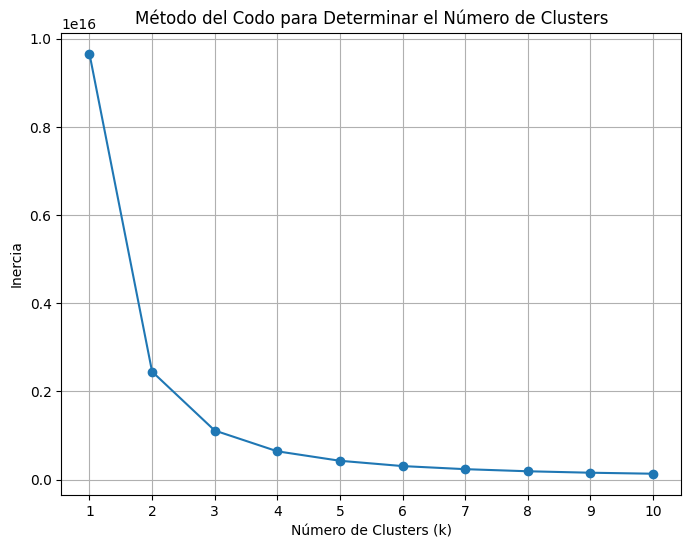

In [20]:
# Graficar el gráfico del codo
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Método del Codo para Determinar el Número de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [21]:


# estandarizar los valores para una mejor aplicación de k-means
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
# aplicar K-means con 2 cluster
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(df)
df.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,cluster
count,1.000000e+04,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,1.704260e+06,103521.544600,17.5029,2.723800,13.396300,10.626600,71.119600,8.224500,0.590300,10.009200,0.50230
std,9.812480e+05,59494.952047,17.8515,2.091638,4.218534,9.180784,38.122912,7.091694,0.491803,6.293193,0.50002
min,7.180000e+02,2.000000,1.0000,0.000000,0.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,0.00000
25%,8.596438e+05,51617.000000,5.0000,1.000000,10.000000,4.000000,31.000000,3.000000,0.000000,4.000000,0.00000
50%,1.700323e+06,103743.500000,11.0000,3.000000,13.000000,7.000000,83.000000,6.000000,1.000000,9.000000,1.00000
75%,2.555425e+06,155277.250000,24.0000,5.000000,16.000000,15.000000,107.000000,11.000000,1.000000,16.000000,1.00000
max,3.420578e+06,206170.000000,100.0000,6.000000,23.000000,30.000000,134.000000,104.000000,1.000000,21.000000,1.00000


In [22]:
# estandarizar los valores para una mejor aplicación de k-means
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
# aplicar K-means con 2 cluster
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(df)
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,cluster
692718,2651135,85443,8,0,11,5,120,12,0,16,0
1614200,2108984,148507,5,4,17,30,38,1,0,1,0
1474705,806839,20659,55,4,11,4,120,8,0,16,1
1370160,1602187,171547,25,0,14,12,83,3,1,4,1
1171623,1180825,120590,29,0,0,15,123,4,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...
36008,2020882,101670,7,3,19,1,24,5,1,4,0
579460,3386509,110782,19,0,13,14,2,14,0,16,0
1316137,1035659,87395,3,0,11,25,89,22,0,13,1
951890,2844510,152340,97,3,18,1,21,2,1,16,0


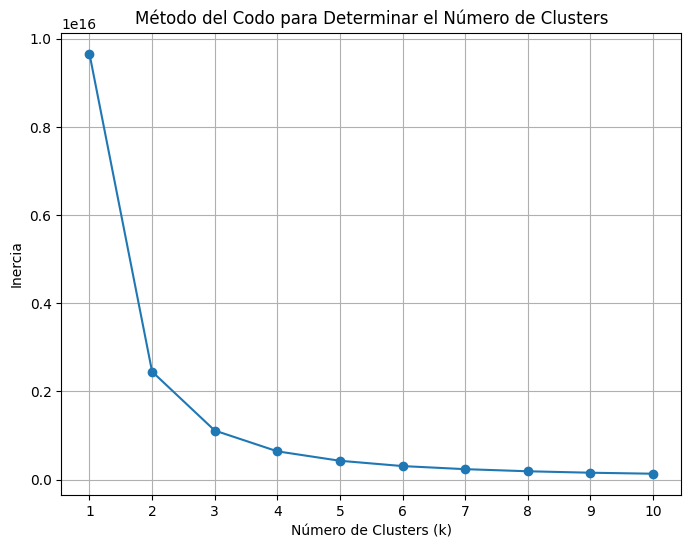

In [23]:
# Definir el rango de k (número de clusters) para probar
k_values = range(1, 11)

# Lista para almacenar la inercia (suma de los errores cuadráticos)
inertia_values = []

# Ejecutar K-means para cada valor de k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia_values.append(kmeans.inertia_)

# Graficar el gráfico del codo
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Método del Codo para Determinar el Número de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [57]:

# Iterar sobre todas las columnas
for col in df.columns:
    unique_values = df[col].unique()  # Encuentra valores únicos directamente desde pandas
    nr_values = len(unique_values)   # Cuenta los valores únicos
    if nr_values < 22:
        print(f"Feature '{col}': {nr_values} unique values --- {unique_values}")
    else:
        print(f"Feature '{col}': {nr_values} unique values")


Feature 'order_id': 9655 unique values
Feature 'user_id': 9099 unique values
Feature 'order_number': 100 unique values
Feature 'order_dow': 7 unique values --- [1 4 0 5 3 6 2]
Feature 'order_hour_of_day': 24 unique values
Feature 'days_since_prior_order': 32 unique values
Feature 'product_id': 134 unique values
Feature 'add_to_cart_order': 54 unique values
Feature 'reordered': 2 unique values --- [1 0]
Feature 'department_id': 21 unique values --- [ 7  1  4 19 13 17 16 20 15 12  3 14 18  9 11  8  6  5 21  2 10]
Feature 'department': 21 unique values --- ['beverages' 'frozen' 'produce' 'snacks' 'pantry' 'household' 'dairy eggs'
 'deli' 'canned goods' 'meat seafood' 'bakery' 'breakfast' 'babies'
 'dry goods pasta' 'personal care' 'pets' 'international' 'alcohol'
 'missing' 'other' 'bulk']
Feature 'product_name': 134 unique values


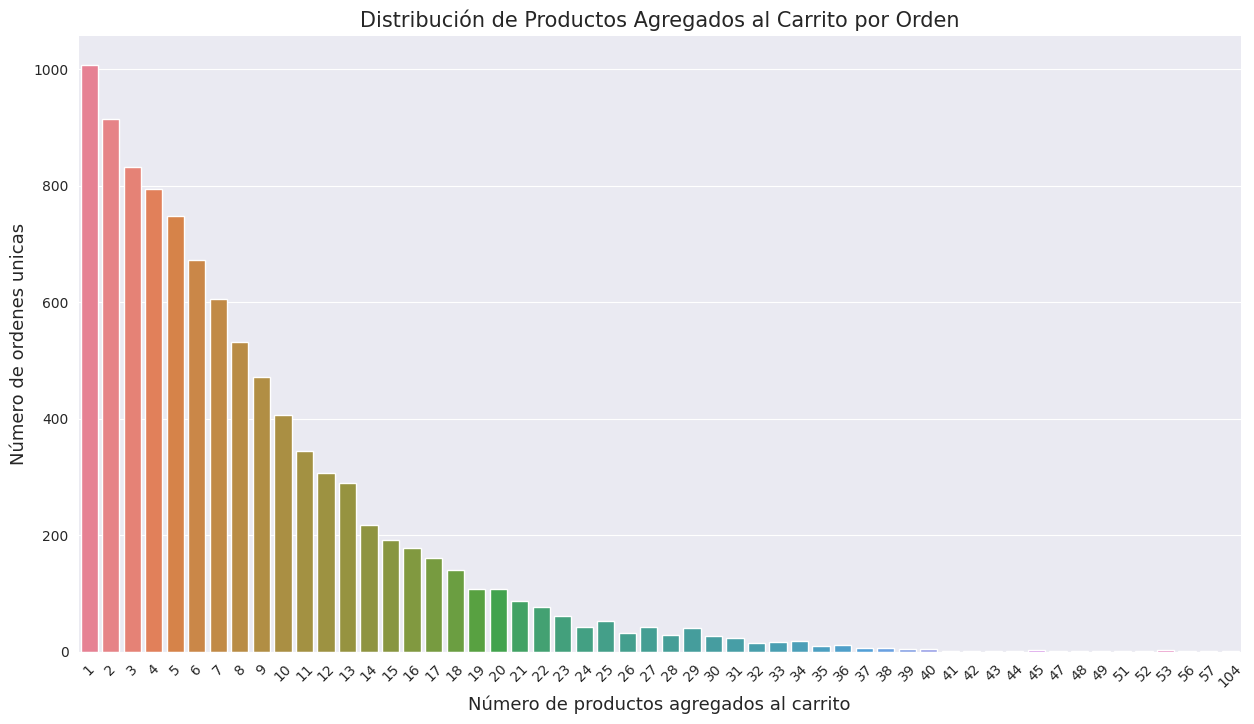

In [58]:
# Agrupación y agregación
grouped = df.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
grouped = grouped.add_to_cart_order.value_counts().sort_index()

# Visualización
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x=grouped.index, y=grouped.values, palette="husl")

# Ajuste de etiquetas
plt.xticks(rotation=45)
plt.ylabel('Número de ordenes unicas', fontsize=13)
plt.xlabel('Número de productos agregados al carrito', fontsize=13)
plt.title('Distribución de Productos Agregados al Carrito por Orden', fontsize=15)

# Mostrar gráfico
sns.despine()
plt.show()

In [59]:
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
794506,1253241,152060,6,1,20,23,115,2,1,7,beverages,water seltzer sparkling water
1900056,3058717,44755,2,1,15,30,37,4,0,1,frozen,ice cream ice
1986766,2252307,169119,12,4,15,9,123,19,0,4,produce,packaged vegetables fruits
794368,188072,162421,3,4,11,30,117,5,0,19,snacks,nuts seeds dried fruit
1623032,2627597,172693,19,0,23,5,17,8,0,13,pantry,baking ingredients
...,...,...,...,...,...,...,...,...,...,...,...,...
33475,875870,140694,61,1,17,0,84,2,1,16,dairy eggs,milk
330120,1343163,39851,12,6,13,9,16,17,0,4,produce,fresh herbs
1012907,2671505,48231,14,5,11,15,24,2,1,4,produce,fresh fruits
916082,2290025,72097,62,0,15,4,78,4,0,19,snacks,crackers


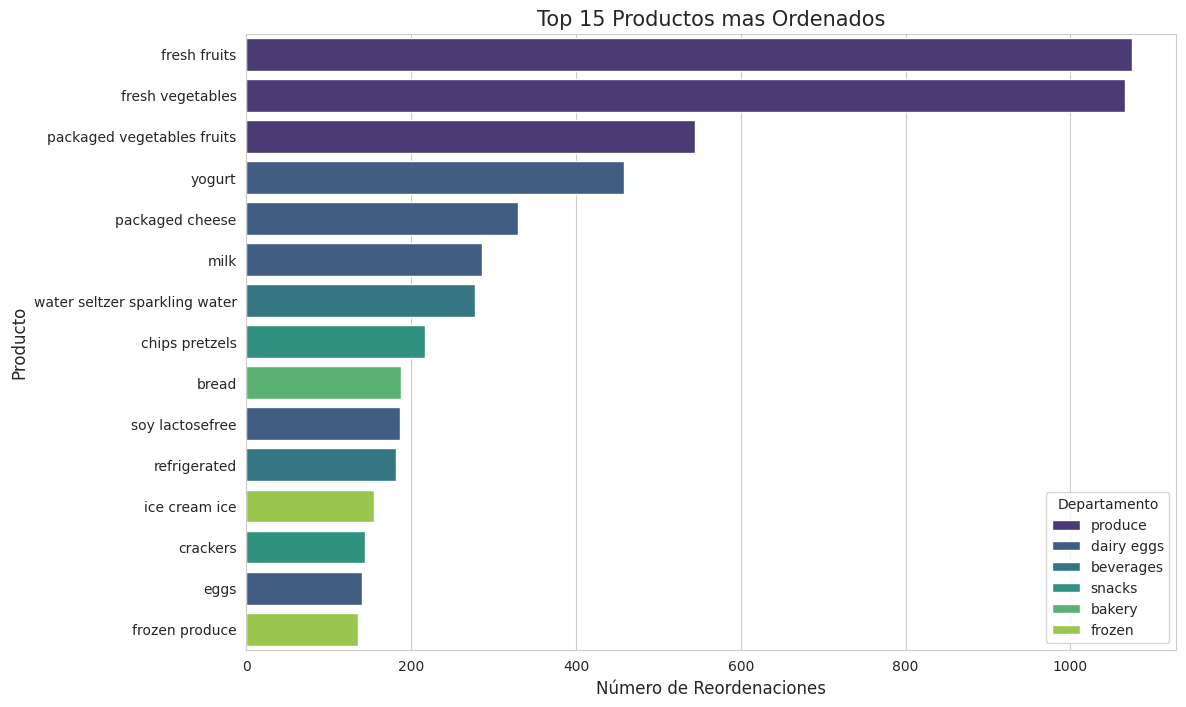

In [77]:
#Reordenando los pedidos realizados por el cliente del mismo producto
grouped = df.groupby(["product_id", "product_name", "department"])["reordered"].aggregate('count').reset_index()
grouped.rename(columns={'reordered': 'reorder_count'}, inplace=True)

# Ordenar y seleccionar los 15 más populares
grouped = grouped.sort_values(by='reorder_count', ascending=False)[:15].reset_index(drop=True)

# Visualización
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))
sns.barplot(
    data=grouped,
    y="product_name",
    x="reorder_count",
    hue="department",
    dodge=False,
    palette="viridis"
)
plt.title("Top 15 Productos mas Ordenados", fontsize=15)
plt.xlabel("Número de Reordenaciones", fontsize=12)
plt.ylabel("Producto", fontsize=12)
plt.legend(title="Departamento")
plt.show()


In [78]:
grouped

,product_id,product_name,department,reorder_count
0,24,fresh fruits,produce,1075
1,83,fresh vegetables,produce,1066
2,123,packaged vegetables fruits,produce,545
3,120,yogurt,dairy eggs,458
4,21,packaged cheese,dairy eggs,330
5,84,milk,dairy eggs,286
6,115,water seltzer sparkling water,beverages,278
7,107,chips pretzels,snacks,217
8,112,bread,bakery,188
9,91,soy lactosefree,dairy eggs,186


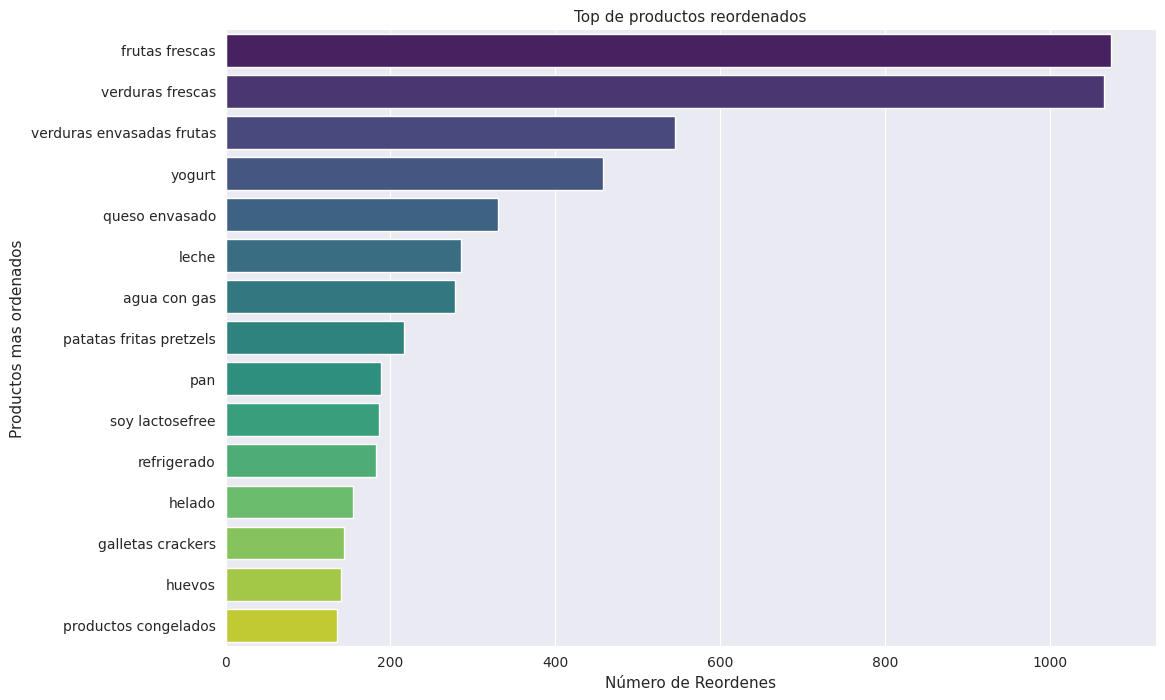

In [79]:
#Cambiar el valor de fresh fruits por frutas secas
replacements = {
    'fresh fruits': 'frutas frescas',
    'fresh vegetables': 'verduras frescas',
    'packaged vegetables fruits': 'verduras envasadas frutas',
    'yogurt': 'yogurt',
    'packaged cheese': 'queso envasado',
    'packaged meat': 'carne envasada',
    'packaged fish': 'pescado envasado',
    'packaged seafood': 'pescado envasado',
    'milk': 'leche',
    'water seltzer sparkling water': 'agua con gas',
    'chips pretzels': 'patatas fritas pretzels',
    'bread': 'pan',
    'syo lactosefree': 'soya sin lactosa',
    'refrigerated': 'refrigerado',
    'ice cream ice': 'helado',
    'crackers': 'galletas crackers',
    'eggs': 'huevos',
    'frozen produce': 'productos congelados'
}

grouped['product_name'] = grouped['product_name'].replace(replacements)

# Agrupación y Ordenación
grouped = grouped.groupby(['product_name']).sum()['reorder_count'].sort_values(ascending=False)

# Selección de los Top N productos
top_n = 15
grouped = grouped.head(top_n)

# Visualización
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x=grouped.values, y=grouped.index, palette="viridis")

# Etiquetas y Estilo
plt.xlabel('Número de Reordenes', fontsize=11)
plt.ylabel('Productos mas ordenados', fontsize=11)
plt.title('Top de productos reordenados', fontsize=11)
sns.despine()

plt.show()

In [76]:
grouped

,reorder_count
product_name,
frutas frescas,1075
verduras frescas,1066
verduras envasadas frutas,545
yogurt,458
queso envasado,330
leche,286
agua con gas,278
patatas fritas pretzels,217
pan,188


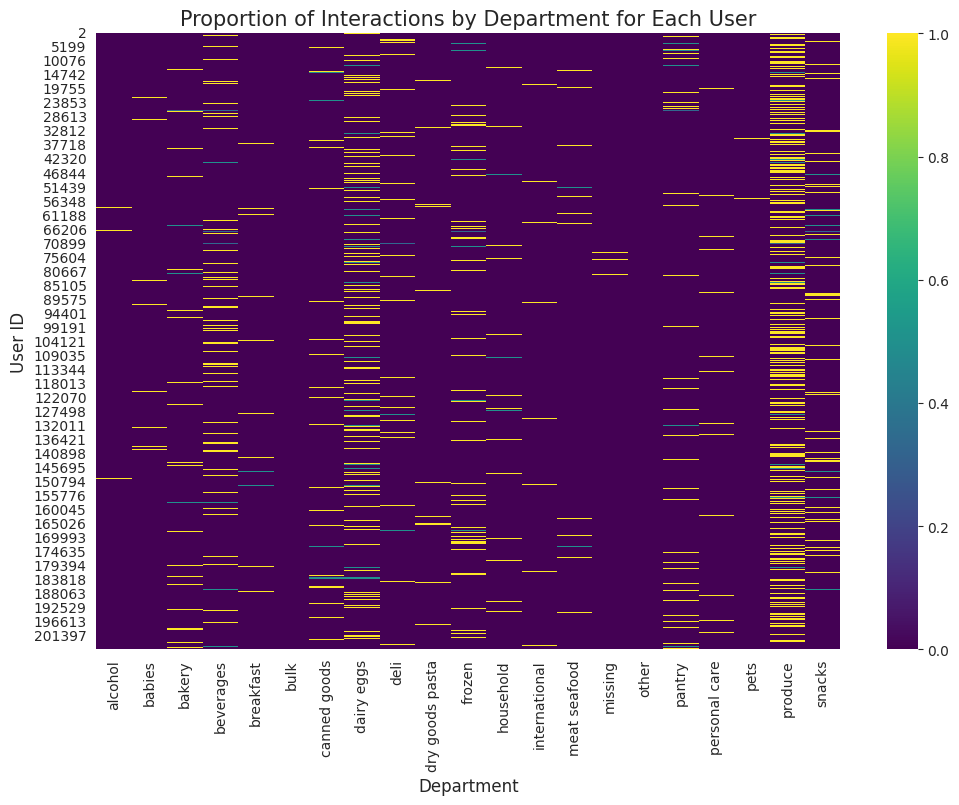

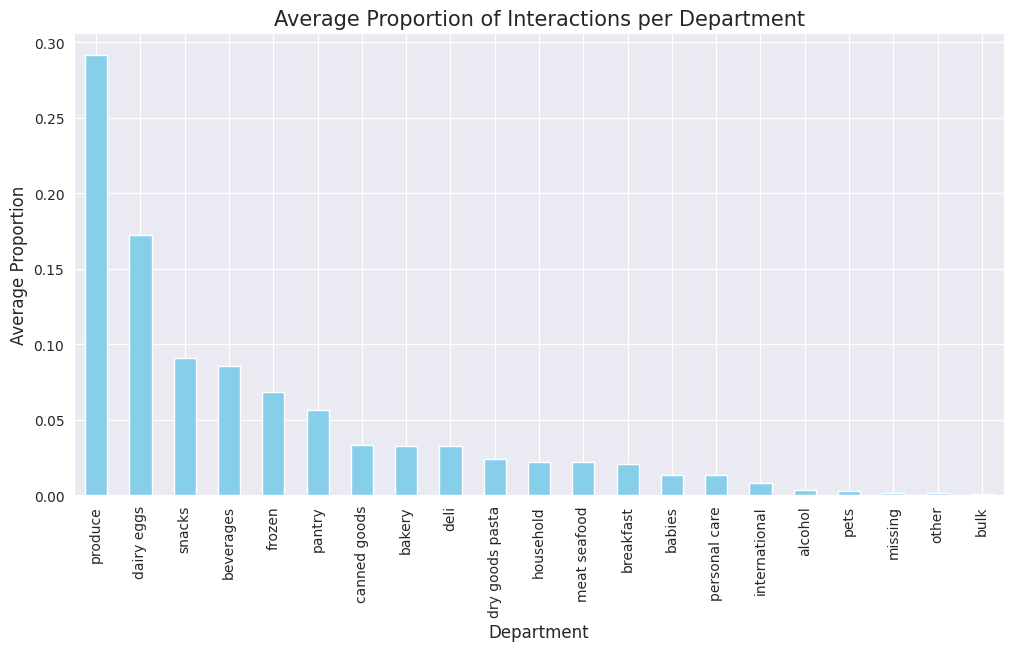

In [80]:
# Crosstab para crear la tabla
clst_prd = pd.crosstab(df['user_id'], df['department'])

# Calcular proporciones por fila
clst_prd = clst_prd.div(clst_prd.sum(axis=1), axis=0)

# Visualización: Mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(clst_prd, cmap='viridis', cbar=True)
plt.title('Proportion of Interactions by Department for Each User', fontsize=15)
plt.xlabel('Department', fontsize=12)
plt.ylabel('User ID', fontsize=12)
plt.show()

# Promedio por departamento
department_avg = clst_prd.mean(axis=0)
department_avg.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Average Proportion of Interactions per Department', fontsize=15)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Average Proportion', fontsize=12)
plt.show()

Clusters assigned: [4 2 2 ... 2 2 3]
Inertia: 4140.067257038874
Silhouette Score: 0.4877910594235156


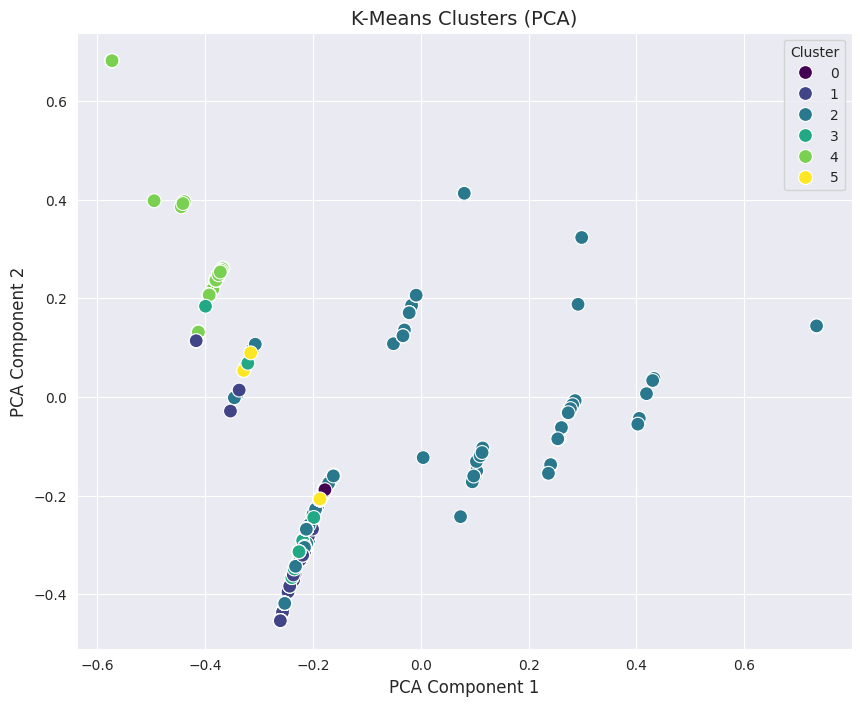

In [94]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Datos de entrenamiento
X_train = clst_prd.values

# Entrenamiento de K-means con 6 clusters
kmeans = KMeans(n_clusters=6, random_state=540).fit(X_train)

# Resultados
print("Clusters assigned:", kmeans.labels_)
print("Inertia:", kmeans.inertia_)

# Silhouette Score
silhouette_avg = silhouette_score(X_train, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

# Visualización con PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans.labels_, palette='viridis', s=100)
plt.title('K-Means Clusters (PCA)', fontsize=14)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.legend(title="Cluster", loc='best')
plt.show()


In [96]:
df.to_csv('/content/drive/MyDrive/ModuloIV/df_clientXproducto.csv', index=False)

The inertia for : 2 Cluster is :  6682.957425369676
The inertia for : 3 Cluster is :  6179.8989610693
The inertia for : 4 Cluster is :  5919.441562181951
The inertia for : 5 Cluster is :  3556.4973572710273
The inertia for : 6 Cluster is :  4140.067257038874
The inertia for : 7 Cluster is :  2617.2299128600616
The inertia for : 8 Cluster is :  2058.0690554318485
The inertia for : 9 Cluster is :  1592.6902624787201


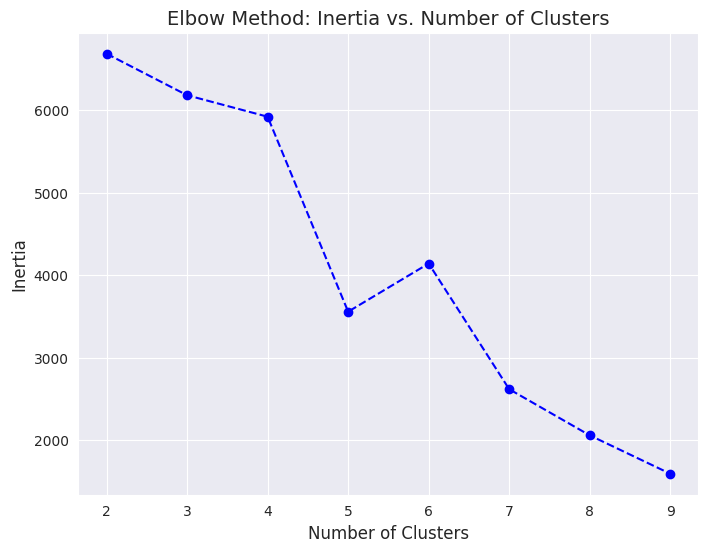

In [93]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Rango de clusters
no_of_clusters = range(2, 10)
inertia = []

# Calcular inercia para cada número de clusters
for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=540)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The inertia for :", f , "Cluster is : " , u)

# Visualización del Método del Codo
plt.figure(figsize=(8, 6))
plt.plot(no_of_clusters, inertia, marker='o', color='b', linestyle='--')
plt.title('Elbow Method: Inertia vs. Number of Clusters', fontsize=14)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.xticks(no_of_clusters)
plt.grid(True)
plt.show()


In [88]:
#Aplicación del algoritmo K-means

# kmeans = KMeans(n_clusters=5, random_state=2)
# kmeans = kmeans.fit(X_train)


# predictions = kmeans.predict(X_train)
# unique , counts = np.unique(predictions, return_counts=True)
# counts = counts.reshape(1, 5)

# countscldf = pd.DataFrame(counts, columns=["Cluster 0 ", "Cluster 1" , "Cluster 2", "Cluster 3", "Cluster 4"])
# countscldf


# # estandarizar los valores para una mejor aplicación de k-means
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df_scaled = scaler.fit_transform(X_train)
# # aplicar K-means con 2 cluster
# kmeans = KMeans(n_clusters=5, random_state=42)
# X_train['cluster'] = kmeans.fit_predict(X_train)
# X_train.describe()

# X_train

#aplicar k-means a X_train con 5 cluster y agregar una columna identificando a que cluster corresponde
kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_train)
predictions = kmeans.predict(X_train)
unique , counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1, 5)




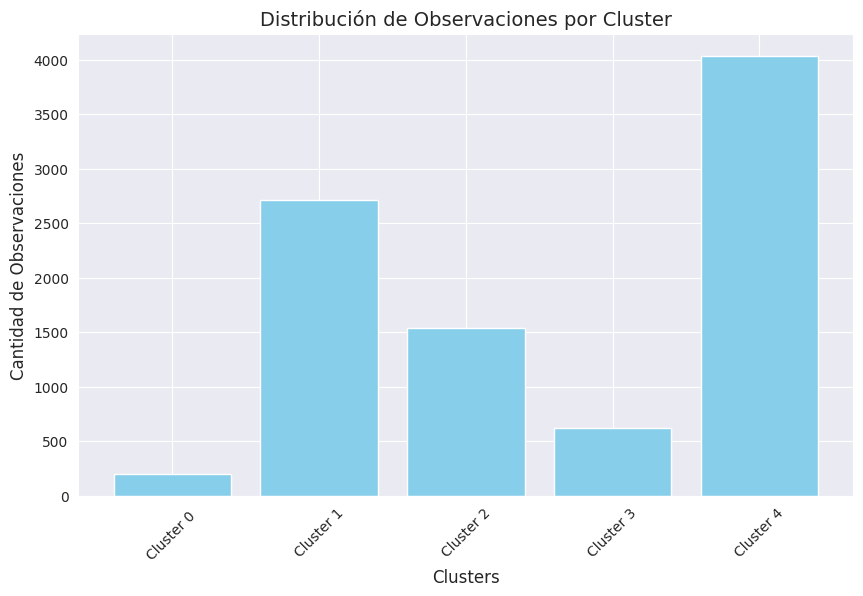

In [89]:
import matplotlib.pyplot as plt

# Graficar los conteos de clusters
plt.figure(figsize=(10, 6))
plt.bar(countscldf.columns, countscldf.iloc[0], color='skyblue')
plt.title('Distribución de Observaciones por Cluster', fontsize=14)
plt.xlabel('Clusters', fontsize=12)
plt.ylabel('Cantidad de Observaciones', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [97]:
countscldf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,194,2716,1536,617,4036


Explained variance ratio (first two components): [0.06324193 0.05560889]
Total explained variance: 0.12


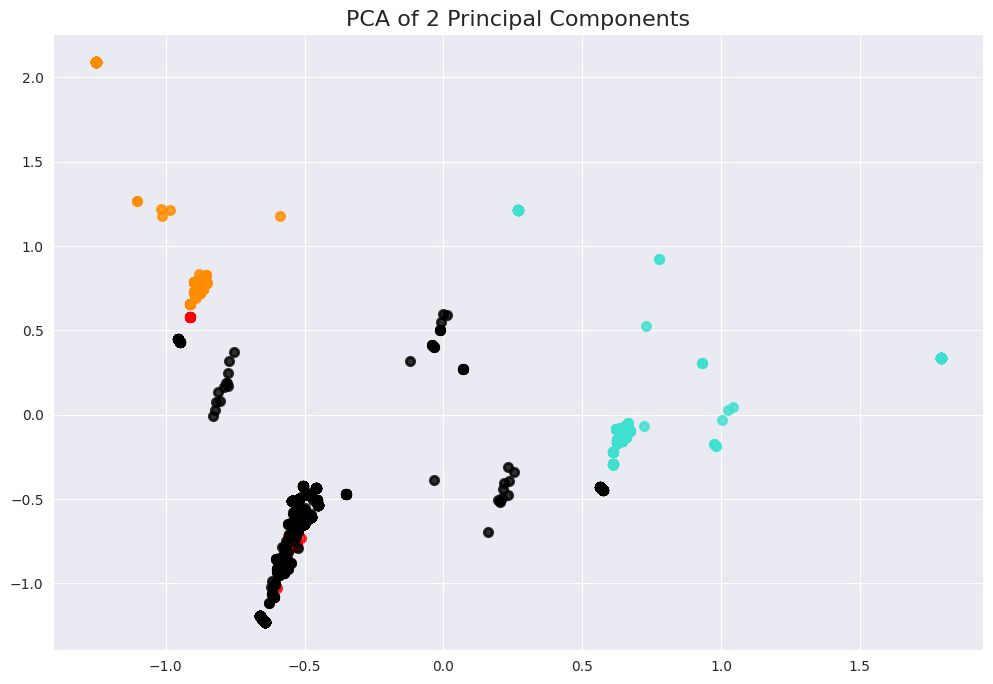

In [106]:
# Importar las librerías necesarias
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Establecer datos de entrada
X = X_train
y_num = predictions

target_names = ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"]

# Escalar los datos (estandarización) para PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=2, random_state=453)
X_r = pca.fit_transform(X_scaled)

# Mostrar la varianza explicada por cada componente
print('Explained variance ratio (first two components):', pca.explained_variance_ratio_)
print(f'Total explained variance: {sum(pca.explained_variance_ratio_):.2f}')

# Visualización de los puntos de datos en el espacio PCA reducido
plt.figure(figsize=(12, 8))

# Colores para cada cluster
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2  # grosor de las líneas

# Graficar cada cluster
for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=0.8, lw=lw, label=target_name)

# Añadir el título
plt.title('PCA of 2 Principal Components', fontsize=16)

# Mostrar gráfico
plt.show()


Total Variance in the dataset: 1.0000
The number of components that explain 95% variance: 13
Variance explained with 13 components: 0.9608



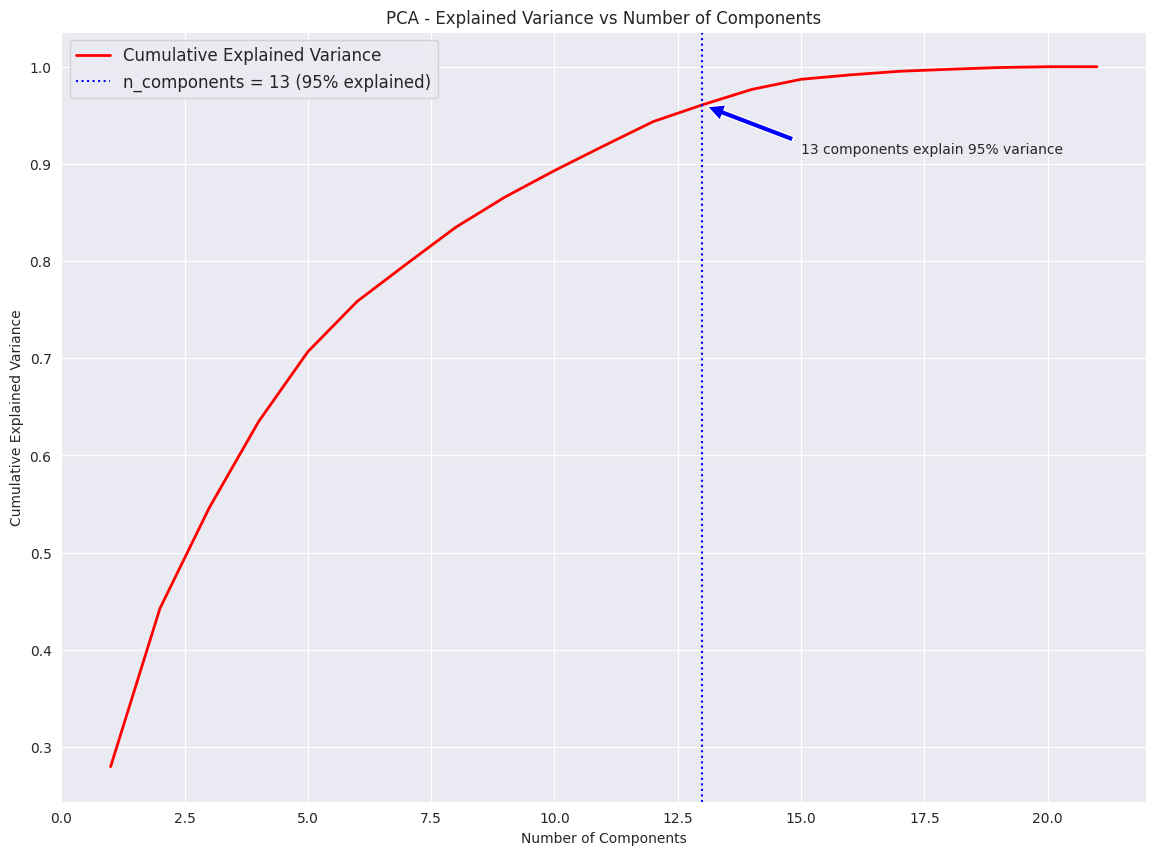

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Definir los datos
X = X_train  # Tu matriz de características

# RUNNING PCA WITH ALL COMPONENTS
n_components = X.shape[1]
pca = PCA(n_components=n_components, random_state=453)
X_r = pca.fit_transform(X)

# CALCULATE CUMULATIVE VARIANCE EXPLAINED
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# CALCULATING THE 95% VARIANCE
var_95 = 0.95  # Umbral de varianza deseada
components_95 = (cumulative_variance >= var_95).argmax() + 1  # El primer índice donde se alcanza el 95%

print(f"Total Variance in the dataset: {cumulative_variance[-1]:.4f}")
print(f"The number of components that explain 95% variance: {components_95}")
print(f"Variance explained with {components_95} components: {cumulative_variance[components_95-1]:.4f}")
print("")

# CREATING A DATAFRAME WITH COMPONENTS & EXPLAINED VARIANCE
components_df = pd.DataFrame({
    "PCA Comp": range(1, n_components + 1),
    "Explained Variance": explained_variance_ratio,
    "Cumulative Variance": cumulative_variance
})

# Visualize the explained variance ratio and cumulative variance
plt.figure(figsize=(14, 10))
plt.plot(range(1, n_components + 1), cumulative_variance, linewidth=2, c="r", label='Cumulative Explained Variance')
plt.axvline(components_95, linestyle=':', label=f'n_components = {components_95} (95% explained)', color='blue')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance vs Number of Components')

# Annotating the 95% line
plt.annotate(f'{components_95} components explain 95% variance',
             xy=(components_95, cumulative_variance[components_95-1]),
             xytext=(components_95 + 2, cumulative_variance[components_95-1] - 0.05),
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.legend(loc='best', fontsize=12)
plt.grid(True)
plt.show()


Inercia de 2 Cluster es: 4510.346900624097
Inercia de 3 Cluster es: 3755.5123011448395
Inercia de 4 Cluster es: 2615.836274981894
Inercia de 5 Cluster es: 2071.419391758039
Inercia de 6 Cluster es: 1459.5356901435555
Inercia de 7 Cluster es: 1188.9900234381043
Inercia de 8 Cluster es: 1052.72454706653
Inercia de 9 Cluster es: 816.4272789905133
Inercia de 10 Cluster es: 294.518719874652


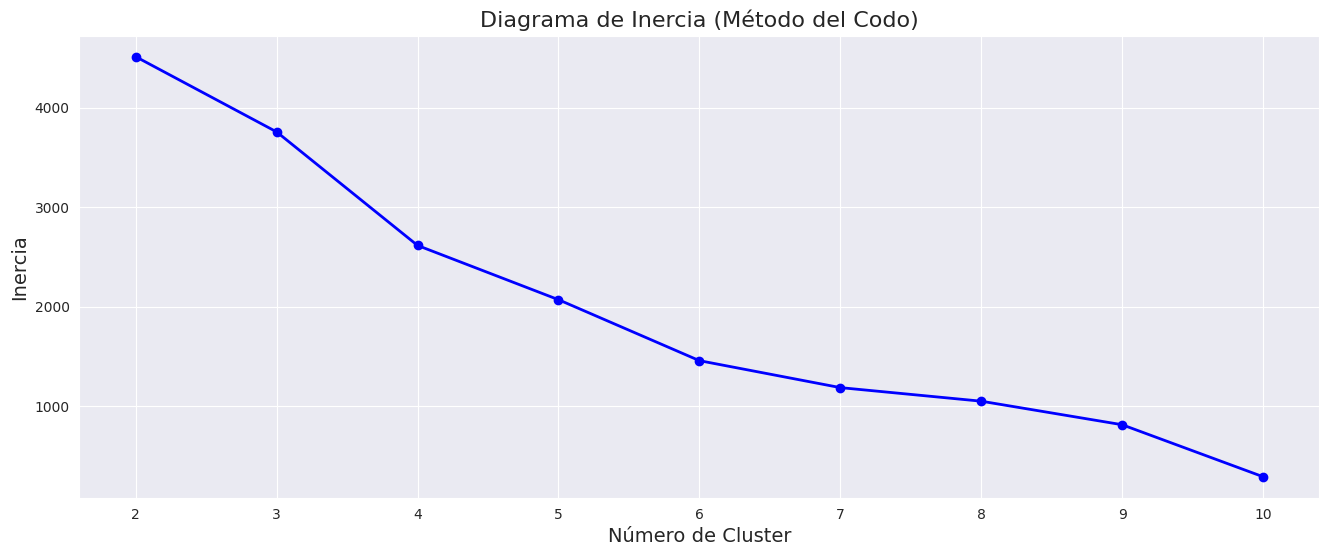

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Parámetros
n_components = 9
no_of_clusters = range(2, 11)  # Rango de clústeres, por ejemplo de 2 a 10

# RUNNING PCA WITH 9 COMPONENTS
pca = PCA(n_components=n_components, random_state=453)
X_r = pca.fit_transform(X)

# RUNNING K-MEANS FOR DIFFERENT NUMBERS OF CLUSTERS AND CALCULATING INERTIA
inertia = []

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans.fit(X_r)
    inertia.append(kmeans.inertia_)  # Almacenar la inercia para cada número de clústeres
    print(f"Inercia de {f} Cluster es: {kmeans.inertia_}")

# PLOTTING THE ELBOW METHOD (INERTIA PLOT)
plt.figure(figsize=(16, 6))
plt.plot(no_of_clusters, inertia, marker='o', color='b', linestyle='-', linewidth=2)
plt.title("Diagrama de Inercia (Método del Codo)", fontsize=16)
plt.xlabel("Número de Cluster", fontsize=14)
plt.ylabel("Inercia", fontsize=14)
plt.xticks(no_of_clusters)  # Asegura que solo se muestren los números de clusters especificados
plt.grid(True)
plt.show()


In [115]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

# STEP 1: Ejecutar PCA con 9 componentes
pca = PCA(n_components=9, random_state=453)
X_r = pca.fit_transform(X)  # Se puede usar `fit_transform` para hacer todo en una línea

# STEP 2: Ejecutar K-means con 5 clusters
kmeans = KMeans(n_clusters=5, random_state=2)
clusters = kmeans.fit_predict(X_r)  # `fit_predict` es más eficiente para obtener etiquetas directamente

# STEP 3: Agregar los conjuntos de cluster al conjunto de datos origina
clst_prd['clusters'] = clusters

# STEP 4: Asignando la categoria a cada fila del conjuto de datos
clst_prd['Cluster Category'] = np.where(clst_prd['clusters'] == 0, 'Cluster 1',
                                        np.where(clst_prd['clusters'] == 1, 'Cluster 2',
                                                 np.where(clst_prd['clusters'] == 2, 'Cluster 3',
                                                          np.where(clst_prd['clusters'] == 3, 'Cluster 4', 'Cluster 5'))))

# Mostrando el resultado con la categoria del cluster
clst_prd


department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,meat seafood,missing,other,pantry,personal care,pets,produce,snacks,clusters,Cluster Category
user_id,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,Cluster 4
91,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Cluster 1
110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,Cluster 2
154,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Cluster 1
160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,Cluster 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Cluster 1
206052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,Cluster 2
206055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,Cluster 1


,count
Cluster Category,
Cluster 1,3393
Cluster 2,2698
Cluster 4,1528
Cluster 3,869
Cluster 5,611


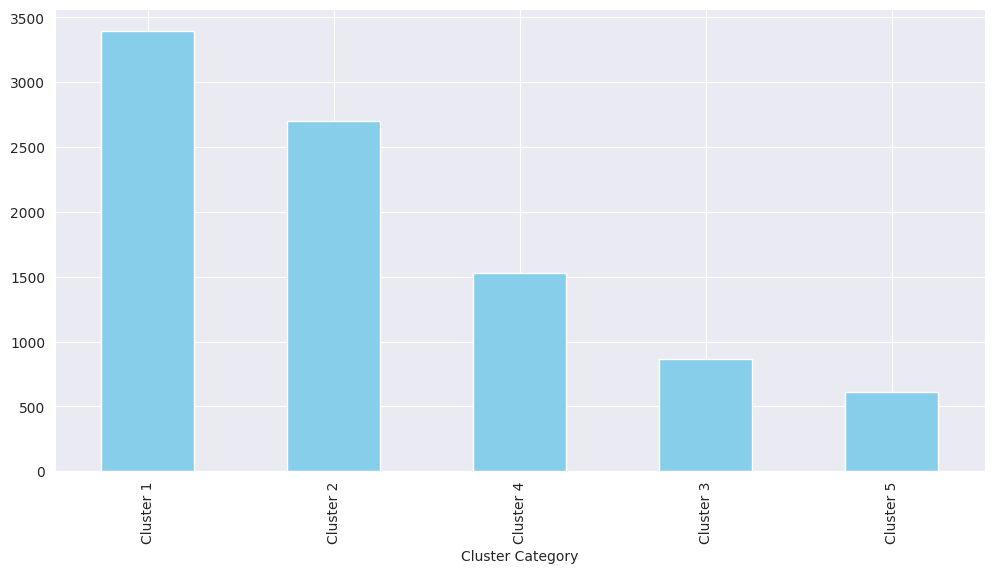

In [112]:
clst_prd['Cluster Category'].value_counts().plot(kind='bar', figsize=(12, 6), color='skyblue')

clst_prd['Cluster Category'].value_counts()